## 資料集介紹

* MNIST 資料集共有訓練資料 60000 筆、測試資料 10000 筆。MNIST 資料集每一筆資料都由 images(數字影像) 與 labels(真實數字) 所組成

## 匯入套件

In [ ]:
# 相容性需求，若使用舊版 pyton 時，可使用新版 python 函式
import numpy as np
import pandas as pd 
from keras.utils import np_utils  # 欲將 Label 標籤轉換為 One-hot encoding

In [ ]:
import matplotlib.pyplot as plt

# 設定 matplotlib 在 jupyter notebook 網頁內顯示圖形，無則另開視窗顯示圖形
%matplotlib inline

In [ ]:
np.random.seed(10)                # 設定 seed 可以讓每次需要隨機產生的資料，都有相同的輸出

In [ ]:
# 匯入資料
from keras.datasets import mnist

# 建立模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

## 資料讀取

* 【Window】下載後的檔案會儲存在「使用者個人資料夾」，如：C:\Users\kevin\.keras\datasets\mnist.npz
* 【Linus】輸入指令：ll ~/.：ll ~/.keras\datasets\mnist.pkl.npz

In [ ]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 資料筆數
print('x train data =', len(x_Train))
print('x test data =', len(x_Test))
print('y train label =', len(y_Train))
print('y test label =', len(y_Test))

x train data = 60000
x test data = 10000
y train label = 60000
y test label = 10000


## 資料前處理

In [ ]:
# 將feature 轉換成4維度 ，也就是6000*28*28*1
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
print(x_Train.shape)

(60000, 28, 28)


In [ ]:
# 數值標準化
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

# label 用one hot enconding 轉換
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

## 建立模型

In [ ]:
model = Sequential()

# 建立卷積層1 => 28*28 大小，但是產生16個影像
# 建立 16 個 filter weight，每一個濾鏡 5x5 大小，設定在邊界之外補 0，產生的卷積影像大小不變，(影像大小,色階維度)
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

# 建立池化層1
# 執行第一次降採樣，原本的 28*28 變成 14*14 => 16 個 14*14
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2 => 將原本的 16 個影像轉換成 36，大小還是 14*14
# 建立 36 個 filter weight，每一個濾鏡 5x5 大小，設定在邊界之外補 0，產生的卷積影像大小不變
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))

# 建立池化層2 => 原本 36 個 14*14 變成，36 個 7*7
model.add(MaxPooling2D(pool_size=(2,2)))

# 加入dropout 避免 overfitting，這裡的0.25，是在每一次捨棄 25% 的神經元
model.add(Dropout(0.25))

# --------------------------------
# 建立神經網路
# 建立平坦層 => 把他們壓扁，所以是 36 個*7*7 = 1764 對應 1764 個神經元
model.add(Flatten())

# 建立隱藏層
model.add(Dense(128, activation='relu'))

# 捨棄 50% 神經元
model.add(Dropout(0.5))

# 建立輸出層
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

### 訓練過程

* compile 方法對訓練模型進行設定
  * loss：設定損失函數，在深度學習通常使用 cross_entropy 交叉熵，訓練效果比較好
  * optimizer：設定訓練時的最優化方法，在深度學習使用 adam 最優化方法，可讓訓練更快收斂，並提高準確度
  * metrics：設定評估模型的方法是 accuracy 準確率

* 使用 model.fit 進行訓練，訓練過程會儲存在 train_history 變數
  * validation_split=0.2：80% 作為訓練資料，20% 作為驗證資料
  * epoch=10：執行 10 次訓練週期
  * batch_size=300：每一批次 300 筆資料
  * verbose=2：顯示訓練過程，訓練完成後會計算此次訓練週期的 accuracy 與 loss，並記錄新增一筆紀錄在 train_history 中
    →使用48000筆訓練資料進行訓練，每一批次300筆，大約可分160批次進行訓練

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Epoch 1/10
160/160 - 69s - loss: 0.4988 - accuracy: 0.8439 - val_loss: 0.1034 - val_accuracy: 0.9686 - 69s/epoch - 430ms/step
Epoch 2/10
160/160 - 72s - loss: 0.1363 - accuracy: 0.9592 - val_loss: 0.0642 - val_accuracy: 0.9814 - 72s/epoch - 448ms/step
Epoch 3/10
160/160 - 67s - loss: 0.0960 - accuracy: 0.9706 - val_loss: 0.0533 - val_accuracy: 0.9846 - 67s/epoch - 416ms/step
Epoch 4/10
160/160 - 60s - loss: 0.0786 - accuracy: 0.9764 - val_loss: 0.0448 - val_accuracy: 0.9867 - 60s/epoch - 372ms/step
Epoch 5/10
160/160 - 65s - loss: 0.0657 - accuracy: 0.9805 - val_loss: 0.0403 - val_accuracy: 0.9880 - 65s/epoch - 404ms/step
Epoch 6/10
160/160 - 56s - loss: 0.0593 - accuracy: 0.9820 - val_loss: 0.0382 - val_accuracy: 0.9893 - 56s/epoch - 350ms/step
Epoch 7/10
160/160 - 56s - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0377 - val_accuracy: 0.9889 - 56s/epoch - 349ms/step
Epoch 8/10
160/160 - 56s - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0346 - val_accuracy: 0.9900 - 56s/epoch - 349

* 結果
  * 準確率越來越高，且「acc 訓練的準確率」比「val_acc 驗證的準確率」高
  * 驗證的誤差越來越低，且「loss 訓練的誤差」比「val_loss 驗證的誤差」小
  * 若「acc 訓練的準確率」一直增加，但「val_acc 驗證的準確率」一直沒增加，就可能是 overfitting 過度擬合的現象
  * 若「acc 訓練的準確率」與「val_acc 驗證的準確率」差距很小，代表已改善 overfitting 的問題


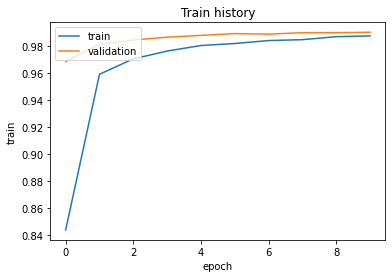

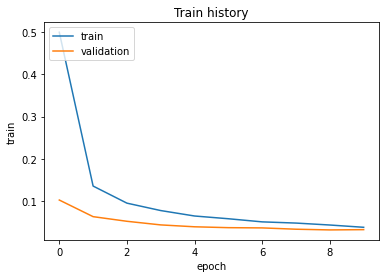

In [ ]:
def show_train_history(train_history, train, validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('Train')
  plt.xlabel('Epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

### 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
print()
print('\t[Info] Accuracy of testing data = {:2.1f}%'.format(scores[1]*100.0))

313/313 [==============================] - 5s 15ms/step - loss: 0.0238 - accuracy: 0.9919

	[Info] Accuracy of testing data = 99.2%


## Predict Data

### 評估模型

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_normalize, y_TestOneHot)   # 評估後的準確率會儲存在 scores
print()
print('\t[Info] Accuracy of testing data = {:2.1f}%'.format(scores[1]*100.0))

313/313 [==============================] - 2s 5ms/step - loss: 0.0713 - accuracy: 0.9779

	[Info] Accuracy of testing data = 97.8%


### 執行預測

In [ ]:
prediction = np.argmax(model.predict(x_Test4D_normalize), axis=1)       # 預測結果存在 prediction 變數
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

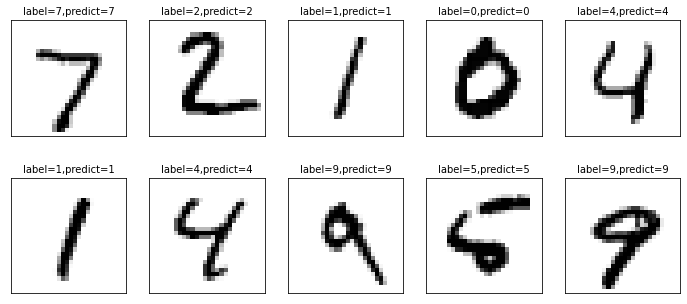

In [ ]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): 
  
  fig= plt.gcf()
  fig.set_size_inches(12,14)


  if num>25:num=25


  for i in range(0,num):

    ax=plt.subplot(5,5,i+1)
    ax.imshow(images[idx],cmap='binary')
    title="label=" +str(labels[idx])

    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])

    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])  
    idx+=1
  plt.show()  

plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)  

### 混淆矩陣 confussion table

* 對角線是預測正確：被正確預測為「1」的筆數最高，不易混淆，被正確預測為「5」的筆數最低，最易混淆
* 其他非對角線的數字，代表將某個標籤預測錯誤，成為另一個標籤：真實為「7」，但預測為「2」及真實為「4」，但預測為「9」最多

In [ ]:
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['prediction']) 

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1131,1,0,0,0,1,2,0,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,2,1002,0,1,0,3,2,0
4,0,0,0,0,974,0,0,0,2,6
5,2,0,0,5,0,880,2,1,0,2
6,4,2,0,1,1,1,948,0,1,0
7,0,1,6,0,0,0,0,1019,1,1
8,3,0,2,1,0,1,0,1,964,2
